## Tarea 6 del curso CM-072

* Nombre y apellidos:
* Fecha de presentación: 17 de octubre.

Sea el siguiente código:

In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def guardar_fig(fig_id, tight_layout=True):
    print("Guardando figura", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_id + ".png", format='png', dpi=300)

- ¿A qué se refiere `plt.rcParams`? Leer [aquí](https://matplotlib.org/users/customizing.html#matplotlib-rcparams) para más información . ¿Qué otras opciones nos da?.
- ¿Cómo guardamos las imágenes en el disco?. ¿Cuáles es la semántica de la llamada de esta función?.

In [2]:
# Tu respuesta

### Entrenando un árbol de decisión

Usaremos el conjunto de datos Iris y crearemos un [Decision Tree Classifier](http://scikit-learn.org/stable/modules/tree.html).

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

clf_arbol= DecisionTreeClassifier(max_depth=2, random_state=42)
clf_arbol.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

- Lee los detalles sobre el conjunto de datos de Iris [aquí](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) y [aquí](https://en.wikipedia.org/wiki/Iris_flower_data_set). ¿Qué características están en el conjunto de datos? ¿Cuál es la variable objetivo (y) y qué valores posibles asume?
    
- ¿Qué características estamos manteniendo para nuestro conjunto de entrenamiento (X)? ¿Cómo cambiarías el código para elegir diferentes características?. Modifique este código para ver cómo influye en los resultados.

- Lea una [explicación de los árboles de decisión](http://scikit-learn.org/stable/modules/tree.html) y luego mire la [documentación] de la función para ver qué parámetros existen. ¿Qué consejos les dan para uso práctico?
 
- (Obligatorio) Ten en cuenta que la ganancia de información no es el criterio de selección predeterminado. ¿Cómo cambiamos eso? (Experimenta con esto en tu respuesta). ¿Cómo se compara el valor predeterminado con la ganancia de información? Aquí hay una [publicación](http://haohanw.blogspot.com/2014/08/ml-decision-tree-rule-selection.html) con información útil.

- `max_depth` se establece en 2. ¿Cómo se relaciona esto con nuestra discusión de sobreajuste? ¿Cómo evitamos el uso de `max_depth`? ¿Puedes encontrar otros parámetros para evitar el sobreajuste?. Muestra en código esos cambios.

In [4]:
# Tus respuestas

### Visualizando el árbol

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
        clf_arbol,
        out_file="iris_arbol",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

- ¿Qué características están en su árbol de decisión?. ¿ Cuantos nodos? -¿Cuáles son las distribuciones de clase para las hojas?.

In [6]:
# Tu respuesta

### Visualizando la frontera de decisión

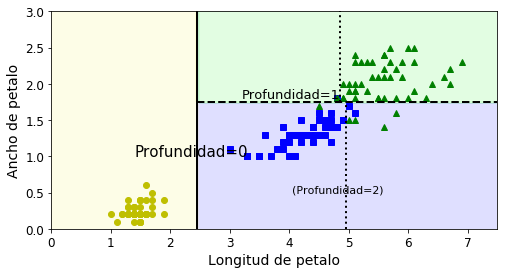

In [7]:
from matplotlib.colors import ListedColormap

def decision_frontera(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_nuevo = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_nuevo).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Longitud de petalo", fontsize=14)
        plt.ylabel("Ancho de petalo", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
decision_frontera(clf_arbol, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Profundidad=0", fontsize=15)
plt.text(3.2, 1.80, "Profundidad=1", fontsize=13)
plt.text(4.05, 0.5, "(Profundidad=2)", fontsize=11)

plt.show()

- Compare su árbol de decisión con el espacio de decisión y anote cualquier correspondencia.
- Modificar el modelo de tu árbol (por ejemplo, diferente profundidad, diferentes criterios de selección). Reescribe tu figura y compara. Es posible que desee cambiar el nombre de la figura para que no se sobrescriba cada vez.

In [8]:
# Tus respuestas

### Predeciendo clases

Una vez que tenga un modelo (árbol), querrá usarlo para hacer predicciones. Las siguientes dos líneas de código muestran dos predicciones diferentes en un ejemplo de prueba `x = [5,1.5]`:

In [9]:
clf_arbol.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [10]:
clf_arbol.predict([[5, 1.5]])

array([1])

- Cuál es la diferencia entre estas dos opciones?
- ¿Cómo se determinan las probabilidades?

In [11]:
# Tus respuestas

### Sensibilidad a los detalles del conjunto de entrenamiento.

Los árboles de decisión tienden a ser sensibles a pequeños cambios en el conjunto de datos. Haremos un experimento para entender esto. Primero, eliminemos el pétalo más ancho del conjunto de entrenamiento (longitud de `4.8` cm y ancho de `1.8` cm):

In [12]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] 

array([[4.8, 1.8]])

In [13]:
no_ancho_versicolor = (X[:, 1]!=1.8) | (y==2) # Encuentra índices de ejemplos que no sean de ancho máximo.
X_d= X[no_ancho_versicolor] # creamos un conjunto de entrenamiento con los pétalos más anchos removidos
y_d = y[no_ancho_versicolor]

clf_arbol_d = DecisionTreeClassifier(max_depth=2, random_state=40) 
clf_arbol_d.fit(X_d, y_d)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

Dibujamos el nuevo resultado:

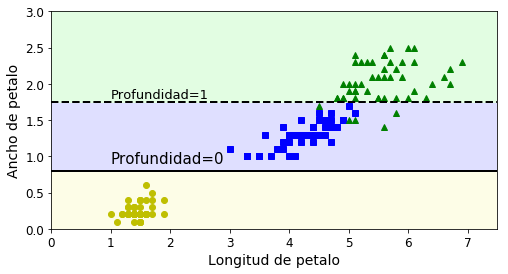

In [14]:
plt.figure(figsize=(8, 4))
decision_frontera(clf_arbol_d, X_d, y_d, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Profundidad=0", fontsize=15)
plt.text(1.0, 1.80, "Profundidad=1", fontsize=13)
plt.show()

- ¿Cómo difiere esto de la frontera de decisión anterior? ¿Hay alguna manera de mitigar este efecto?

In [15]:
# Tu respuesta